In [26]:
from src import Prep
from src.Time_Series_Helper_Funcs import *
from src.TSA import *

In [27]:
%load_ext autoreload

In [28]:
%reload_ext autoreload

In [29]:
%autoreload

In [30]:
df = Prep.prep()

1 of 11 |    Reading in first dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
Elapsed time is 36.673660 seconds.
2 of 11 |    Reading in second dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
Elapsed time is 2.922851 seconds.
3 of 11 |    Concatenating datasets together
4 of 11 |    Refining to only RES Customer Segment
5 of 11 |    Cleaning up column names
6 of 11 |    Sorting values by installation_date
7 of 11 |    Assigning installation_date as index
8 of 11 |    Replacing all null values with median values from same year
9 of 11 |    Adusting prices for inflation
Elapsed time is 78.254911 seconds.
10 of 11|    Creating target variable: cost_per_watt
11 of 11|    Removing > 1600 outliers above $25 per watt
Prep complete 
 ------

In [33]:
y, lag_cost, solar_model = shortened_timeline(df)[0], shortened_timeline(df)[1], shortened_timeline(df)[2]

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.739e+04
Date:                Wed, 18 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:25:50   Log-Likelihood:                -317.53
No. Observations:                 885   AIC:                             643.1
Df Residuals:                     881   BIC:                             662.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0234      0.035      0.675      0.500      -0.045       0.091
L

In [34]:
compute_autocorrelation(lag_cost)

-0.3150657141937809

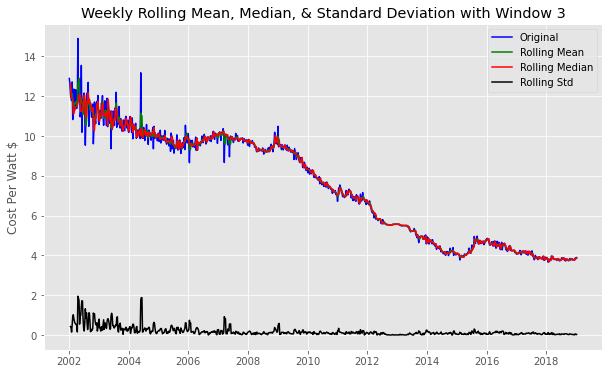

Results of Dickey-Fuller Test:
Test Statistic                  -1.321585
p-value                          0.619240
#Lags Used                      21.000000
Number of Observations Used    866.000000
Critical Value (1%)             -3.437924
Critical Value (5%)             -2.864883
Critical Value (10%)            -2.568550
dtype: float64


In [35]:
rolling_plot(y)
test_stationarity(y)